In [2]:
path = r'C:\Users\harik\OneDrive\Documents\Python\BTP\VGG-19'

os.mkdir(path)

FileExistsError: [WinError 183] Cannot create a file when that file already exists: 'C:\\Users\\harik\\OneDrive\\Documents\\Python\\BTP\\VGG-19'

In [1]:
import tensorflow as tf
import tensorflow.keras
from tensorflow import keras
import matplotlib.pyplot as plt
import os
import time
import pandas as pd
import random
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
config = ConfigProto()
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

physical_devices = tf.config.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(physical_devices[0], True)

In [57]:
from tensorflow.python.client import device_lib 
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 6671258866423244237
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 4183621632
locality {
  bus_id: 1
  links {
  }
}
incarnation: 11006403099910063055
physical_device_desc: "device: 0, name: NVIDIA GeForce GTX 1660 Ti, pci bus id: 0000:01:00.0, compute capability: 7.5"
]


In [97]:
os.chdir(r'C:\Users\harik\OneDrive\Documents\Projects\BTP\1907French-etal-SDLE-EL-ImageDataSet-forML')
filenames = os.listdir("train_test/c0")
print(filenames)
categories_train = []
filenamefin_train = []
for filename in filenames:
      categories_train.append("0")
      filenamefin_train.append(filename)
filenames = os.listdir("train_test/c1")


for filename in filenames:
    categories_train.append("1")
    filenamefin_train.append(filename)

filenames = os.listdir("train_test/c2")
for filename in filenames:
    categories_train.append("2")
    filenamefin_train.append(filename)

    
filenames = os.listdir("train_test/c3")
for filename in filenames:
    categories_train.append("3")
    filenamefin_train.append(filename)

filenames = os.listdir("train_test/c4")
for filename in filenames:
    categories_train.append("4")
    filenamefin_train.append(filename)
  
df = pd.DataFrame({'filename': filenamefin_train,'category': categories_train})
df.shape

['A1-DH3000-3000h-PT-cell1.jpg', 'A1-DH3000-3000h-PT-cell10.jpg', 'A1-DH3000-3000h-PT-cell11.jpg', 'A1-DH3000-3000h-PT-cell12.jpg', 'A1-DH3000-3000h-PT-cell13.jpg', 'A1-DH3000-3000h-PT-cell14.jpg', 'A1-DH3000-3000h-PT-cell15.jpg', 'A1-DH3000-3000h-PT-cell16.jpg', 'A1-DH3000-3000h-PT-cell17.jpg', 'A1-DH3000-3000h-PT-cell18.jpg', 'A1-DH3000-3000h-PT-cell19.jpg', 'A1-DH3000-3000h-PT-cell2.jpg', 'A1-DH3000-3000h-PT-cell20.jpg', 'A1-DH3000-3000h-PT-cell21.jpg', 'A1-DH3000-3000h-PT-cell22.jpg', 'A1-DH3000-3000h-PT-cell24.jpg', 'A1-DH3000-3000h-PT-cell25.jpg', 'A1-DH3000-3000h-PT-cell26.jpg', 'A1-DH3000-3000h-PT-cell27.jpg', 'A1-DH3000-3000h-PT-cell28.jpg', 'A1-DH3000-3000h-PT-cell29.jpg', 'A1-DH3000-3000h-PT-cell3.jpg', 'A1-DH3000-3000h-PT-cell30.jpg', 'A1-DH3000-3000h-PT-cell31.jpg', 'A1-DH3000-3000h-PT-cell32.jpg', 'A1-DH3000-3000h-PT-cell33.jpg', 'A1-DH3000-3000h-PT-cell34.jpg', 'A1-DH3000-3000h-PT-cell36.jpg', 'A1-DH3000-3000h-PT-cell37.jpg', 'A1-DH3000-3000h-PT-cell38.jpg', 'A1-DH3000-3

(3223, 2)

In [60]:
X = df['filename']
y = df['category']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=10, stratify=y)

In [61]:
train_df = pd.DataFrame({'filename': X_train,'category': y_train})
test_df = pd.DataFrame({'filename': X_test, 'category': y_test})

['2']


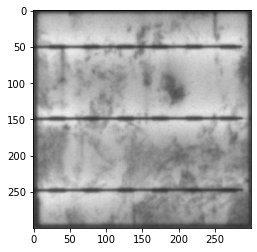

In [62]:
sample = random.choice(X)
orders = df.loc[df.filename == sample, 'category'].unique()
print(orders)
if orders == '0':
  image = load_img("train/c0/" + sample)
elif orders == '1':
  image = load_img("train/c1/" + sample)
elif orders == '2':
  image = load_img("train/c2/" + sample)
elif orders == '3':
  image = load_img("train/c3/" + sample)
elif orders == '4':
  image = load_img("train/c4/" + sample)
plt.imshow(image)

In [73]:
df['category'].value_counts(sort = False)

0     190
1     271
2    1866
3     187
4     709
Name: category, dtype: int64

In [64]:
total_train = train_df.shape[0]
batch_size=16
IMAGE_SIZE=(150,150)

In [65]:
train_datagen = ImageDataGenerator(
    rotation_range=15,
    rescale=1./255,
    shear_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip = True,
    width_shift_range=0.1,
    height_shift_range=0.1
)
train_generator = train_datagen.flow_from_dataframe(
    train_df, 
    "train_test_set", 
    x_col='filename',
    y_col='category',
    target_size=IMAGE_SIZE,
    class_mode='categorical',
    batch_size=batch_size
)

Found 2578 validated image filenames belonging to 5 classes.


In [66]:
test_gen = ImageDataGenerator(rescale=1./255)
test_generator = test_gen.flow_from_dataframe(
    test_df, 
    "train_test_set", 
    x_col='filename',
    y_col='category',
    class_mode='categorical',
    target_size=IMAGE_SIZE,
    batch_size=batch_size,
    shuffle = False
)

Found 645 validated image filenames belonging to 5 classes.


In [106]:
model_vgg19= tf.keras.applications.VGG19(weights="imagenet", include_top=False, input_shape = (150,150,3))
print(model_vgg19.summary())

Model: "vgg19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0     

In [107]:
i = 0
for layer in model_vgg19.layers[:]:
    if(i%2 == 0):
        layer.trainable = False
    i = i+1
for layer in model_vgg19.layers:
    print(layer, layer.trainable)

<keras.engine.input_layer.InputLayer object at 0x000001A50AFA13A0> False
<keras.layers.convolutional.Conv2D object at 0x000001A50AFA1B50> True
<keras.layers.convolutional.Conv2D object at 0x000001A50AFA1D00> False
<keras.layers.pooling.MaxPooling2D object at 0x000001A50AFC3700> True
<keras.layers.convolutional.Conv2D object at 0x000001A56207D8E0> False
<keras.layers.convolutional.Conv2D object at 0x000001A507EFDD00> True
<keras.layers.pooling.MaxPooling2D object at 0x000001A507EF7070> False
<keras.layers.convolutional.Conv2D object at 0x000001A507EFD9D0> True
<keras.layers.convolutional.Conv2D object at 0x000001A507F09D00> False
<keras.layers.convolutional.Conv2D object at 0x000001A507F09460> True
<keras.layers.convolutional.Conv2D object at 0x000001A507F112E0> False
<keras.layers.pooling.MaxPooling2D object at 0x000001A507F2A100> True
<keras.layers.convolutional.Conv2D object at 0x000001A507F1DEE0> False
<keras.layers.convolutional.Conv2D object at 0x000001A507F2CA60> True
<keras.laye

In [108]:
# Create the model
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
new_model = Sequential()
# Add the vgg convolutional base model

new_model.add(model_vgg19)

new_model.add(Flatten())
new_model.add(Dense(64, activation='relu'))
new_model.add(tensorflow.keras.layers.Dropout(0.5))
new_model.add(Dense(5, activation='softmax'))
# Show a summary of the new_model. Check the number of trainable parameters

new_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg19 (Functional)           (None, 4, 4, 512)         20024384  
_________________________________________________________________
flatten_2 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 64)                524352    
_________________________________________________________________
dropout_2 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 5)                 325       
Total params: 20,549,061
Trainable params: 10,998,533
Non-trainable params: 9,550,528
_________________________________________________________________


In [109]:
new_model.compile(loss='categorical_crossentropy', optimizer=tf.optimizers.Adam(learning_rate=0.0001), metrics=['accuracy'])
new_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg19 (Functional)           (None, 4, 4, 512)         20024384  
_________________________________________________________________
flatten_2 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 64)                524352    
_________________________________________________________________
dropout_2 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 5)                 325       
Total params: 20,549,061
Trainable params: 10,998,533
Non-trainable params: 9,550,528
_________________________________________________________________


In [111]:
history = new_model.fit(train_generator, epochs=500)

Epoch 1/500
162/162 [==============================] - 19s 115ms/step - loss: 0.5636 - accuracy: 0.8200
Epoch 2/500
162/162 [==============================] - 19s 115ms/step - loss: 0.3155 - accuracy: 0.9015
Epoch 3/500
162/162 [==============================] - 19s 115ms/step - loss: 0.2660 - accuracy: 0.9158
Epoch 4/500
162/162 [==============================] - 19s 115ms/step - loss: 0.2569 - accuracy: 0.9240
Epoch 5/500
162/162 [==============================] - 19s 118ms/step - loss: 0.2316 - accuracy: 0.9313
Epoch 6/500
162/162 [==============================] - 19s 117ms/step - loss: 0.2084 - accuracy: 0.9341
Epoch 7/500
162/162 [==============================] - 19s 114ms/step - loss: 0.1854 - accuracy: 0.9403
Epoch 8/500
162/162 [==============================] - 19s 114ms/step - loss: 0.1634 - accuracy: 0.9519
Epoch 9/500
162/162 [==============================] - 19s 114ms/step - loss: 0.1837 - accuracy: 0.9434
Epoch 10/500
162/162 [==============================] - 19s 114m

162/162 [==============================] - 19s 114ms/step - loss: 0.1023 - accuracy: 0.9756
Epoch 80/500
162/162 [==============================] - 19s 116ms/step - loss: 0.0492 - accuracy: 0.9856
Epoch 81/500
162/162 [==============================] - 19s 117ms/step - loss: 0.0481 - accuracy: 0.9853
Epoch 82/500
162/162 [==============================] - 19s 115ms/step - loss: 0.0517 - accuracy: 0.9864
Epoch 83/500
162/162 [==============================] - 19s 115ms/step - loss: 0.0414 - accuracy: 0.9880
Epoch 84/500
162/162 [==============================] - 19s 115ms/step - loss: 0.0512 - accuracy: 0.9853
Epoch 85/500
162/162 [==============================] - 19s 115ms/step - loss: 0.0488 - accuracy: 0.9849
Epoch 86/500
162/162 [==============================] - 19s 115ms/step - loss: 0.0601 - accuracy: 0.9853
Epoch 87/500
162/162 [==============================] - 19s 119ms/step - loss: 0.0380 - accuracy: 0.9884
Epoch 88/500
162/162 [==============================] - 19s 115ms/st

162/162 [==============================] - 19s 114ms/step - loss: 0.0127 - accuracy: 0.9961
Epoch 234/500
162/162 [==============================] - 19s 115ms/step - loss: 0.0305 - accuracy: 0.9907
Epoch 235/500
162/162 [==============================] - 19s 117ms/step - loss: 0.0317 - accuracy: 0.9895
Epoch 236/500
162/162 [==============================] - 19s 114ms/step - loss: 0.0248 - accuracy: 0.9934
Epoch 237/500
162/162 [==============================] - 19s 115ms/step - loss: 0.0186 - accuracy: 0.9942
Epoch 238/500
162/162 [==============================] - 19s 114ms/step - loss: 0.0096 - accuracy: 0.9969
Epoch 239/500
162/162 [==============================] - 19s 114ms/step - loss: 0.0133 - accuracy: 0.9981
Epoch 240/500
162/162 [==============================] - 19s 115ms/step - loss: 0.0183 - accuracy: 0.9961
Epoch 241/500
162/162 [==============================] - 19s 117ms/step - loss: 0.0210 - accuracy: 0.9926
Epoch 242/500
162/162 [==============================] - 19s

162/162 [==============================] - 22s 134ms/step - loss: 0.0212 - accuracy: 0.9969
Epoch 386/500
162/162 [==============================] - 20s 125ms/step - loss: 0.0055 - accuracy: 0.9977
Epoch 387/500
162/162 [==============================] - 20s 124ms/step - loss: 0.0082 - accuracy: 0.9977
Epoch 388/500
162/162 [==============================] - 20s 125ms/step - loss: 0.0072 - accuracy: 0.9969
Epoch 389/500
162/162 [==============================] - 21s 131ms/step - loss: 0.0182 - accuracy: 0.9984
Epoch 390/500
162/162 [==============================] - 21s 128ms/step - loss: 0.0064 - accuracy: 0.9969
Epoch 391/500
162/162 [==============================] - 22s 135ms/step - loss: 0.0138 - accuracy: 0.9965
Epoch 392/500
162/162 [==============================] - 23s 138ms/step - loss: 0.0171 - accuracy: 0.9953s - loss: 0.0173 - accuracy
Epoch 393/500
162/162 [==============================] - 20s 123ms/step - loss: 0.0207 - accuracy: 0.9938
Epoch 394/500
162/162 [==========

In [122]:

file1 = open(os.path.join(path, 'info.txt'),"a")
print(new_model.evaluate(test_generator), '\n', file = file1)
file1.close()
predictions = new_model.predict(test_generator)

41/41 [==============================] - 43s 1s/step - loss: 0.1673 - accuracy: 0.9829TA: 28s - ETA: 1s - loss: 0.1686 - accuracy: 0.


500


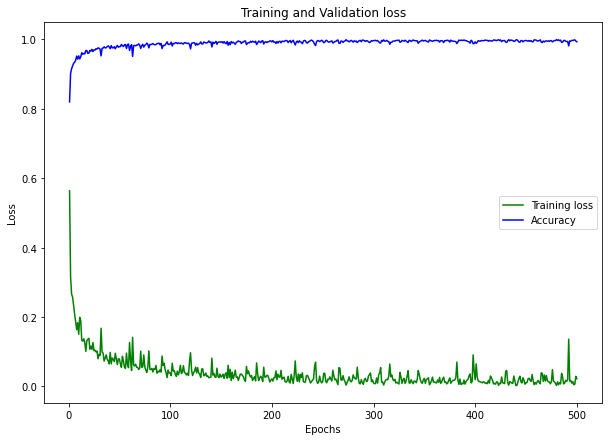

In [123]:
loss_train = history.history['loss']
loss_val = history.history['accuracy']
fig = plt.figure(figsize=(10, 7))
epochs = range(1,501)
print(len(epochs))
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='Accuracy')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.savefig(os.path.join(path, 'Loss.png'), dpi = 100)
plt.show()

In [116]:
def process_images(n):
    t = test_df.iloc[n]
    sample = t.filename
    orders = t.category
    image = load_img("train_test_set/" + sample)
    return ord(orders), predictions[n].argmax(), image

In [117]:
s = predictions.shape
pred = np.zeros((5, 5))
lis = []
for i in range(1, s[0]):
  tr1, pr1, img = process_images(i)
  tr1 = tr1 - 48
  if(tr1 != pr1):
    lis.append(img)
    #print(pr1, tr1)
  pred[pr1, tr1] = pred[pr1, tr1] + 1
pred_true = pd.DataFrame(pred)
pred_true.head()

,0,1,2,3,4
0,38.0,0.0,0.0,0.0,0.0
1,0.0,46.0,3.0,0.0,0.0
2,0.0,7.0,371.0,0.0,0.0
3,0.0,0.0,0.0,37.0,0.0
4,0.0,0.0,0.0,0.0,142.0


In [119]:
model_json = new_model.to_json()
with open(os.path.join(path, 'model.json'), "w") as json_file:
    json_file.write(model_json)
new_model.save_weights(os.path.join(path, 'model.h5'))
print("Saved model to disk")

Saved model to disk


In [120]:
hist_df = pd.DataFrame(history.history)
hist_df.to_csv(os.path.join(path, 'history.csv'))
    
file1 = open(os.path.join(path, 'info.txt'),"a")
file1.write("Learning rate = 0.0001 train test split = 0.20 loss = categorical cross entropy optimizer = adam")
file1.close()

pred_true.to_csv(os.path.join(path, 'Pred_true.csv'))

## Extras

In [ ]:
from sklearn import metrics

In [17]:
cm = pd.read_csv(os.path.join(path, 'Pred_true.csv'))
cm.head()

,Unnamed: 0,0,1,2,3,4
0,0,38.0,0.0,0.0,0.0,0.0
1,1,0.0,44.0,0.0,0.0,0.0
2,2,0.0,9.0,374.0,0.0,0.0
3,3,0.0,0.0,0.0,37.0,0.0
4,4,0.0,0.0,0.0,0.0,142.0


In [13]:
cm = np.array(cm)
a_del = np.delete(cm, 0, 1)
a_del = a_del.transpose()

In [ ]:
cm=metrics.confusion_matrix(test_true[1], test_true[0])
print(cm)
plt.imshow(cm, cmap='binary')

In [1]:
import seaborn as sns
fig, ap = plt.subplots(figsize = (10,8))
ax = sns.heatmap(a_del, annot=True, cmap='Blues', ax = ap)

ax.set_title('Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['Poly-Corroded','Poly-Cracked', 'Poly-Good', 'Mono-Cracked', 'Mono-Good'])
ax.yaxis.set_ticklabels(['Poly-Corroded','Poly-Cracked', 'Poly-Good', 'Mono-Cracked', 'Mono-Good'])

## Display the visualization of the Confusion Matrix.
plt.show()


NameError: name 'plt' is not defined